### Dependencies

In [2]:
import glob
import numpy as np
import os
import collections
import sys

import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt

import cv2
import imageio
import csv
from tifffile import TiffFile, imsave, imread, imwrite

from scipy import signal
from scipy.ndimage import uniform_filter1d


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

from torchvision import transforms
from torchinfo import summary

import argparse
import yaml
import xgboost as xgb 

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

from filters import sliding_filter, hysteresis_threshold_segment, sliding_slope_filter

import monai

%load_ext autoreload


In [3]:
with open('/project/ahoover/mhealth/zeyut/tmc/TMC AI Files/configs.yaml', 'r') as file:
    configs = yaml.safe_load(file)

#### XGBoost on static data
Scripts for data processing, training, and testing are in notebook 'tmc_xgboost.ipynb'.\
Use stored results for analysis

Accuracy: 0.36363636363636365
Precision: 0.36363636363636365
Recall: 0.36363636363636365


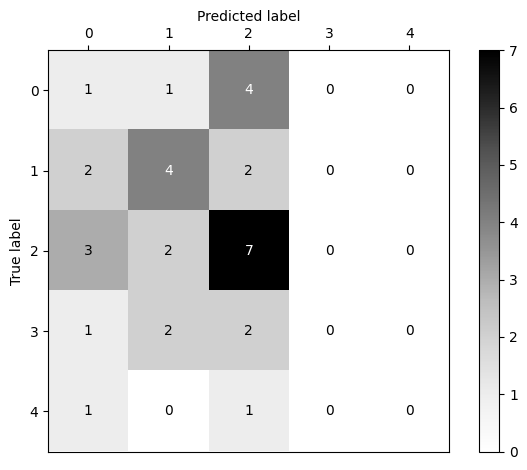

In [11]:
'''Old grading scheme
'''
df_image_old = pd.read_csv(os.path.join(configs['results_path'],'static_model', 'result_1.csv'))
all_preds = df_image_old['Prediction'].to_list()
all_labels = df_image_old['Ground Truth'].to_list()

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='micro')
recall = recall_score(all_labels, all_preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('cm_static_old.jpg', dpi=300)

In [1]:
'''New grading scheme
'''
df_image_new = pd.read_csv(os.path.join(configs['results_path'],'static_model', 'result_2.csv'))
all_preds = df_image_new['Prediction'].to_list()
all_labels = df_image_new['Ground Truth'].to_list()

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='micro')
recall = recall_score(all_labels, all_preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('./figures/cm_static_new.jpg', dpi=300)



NameError: name 'pd' is not defined

#### paralleled CNN-LSTM on kinematic data
Scripts for data processing, training, and testing are under folder 'kinematic_model'.
- Usage:
    - python run.py grade_idx (grade_idx: 1 = old grading scheme, 2 = new grading scheme)
    - run.sh under linux environment
    
Use stored results for analysis

Accuracy: 0.15625
Precision: 0.15625
Recall: 0.15625


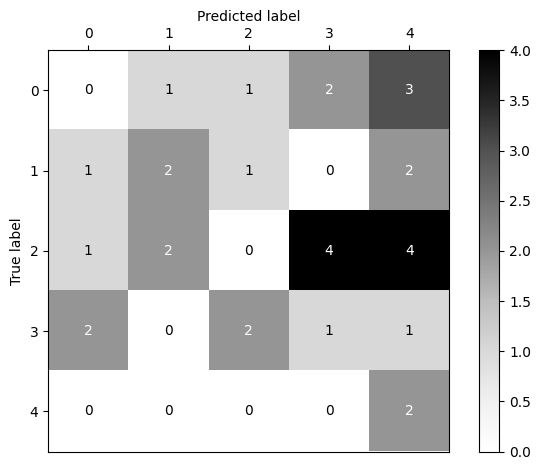

In [12]:
'''Old grading scheme
'''
df_kinematic_old = pd.read_csv(os.path.join(configs['results_path'], 'kinematic_model', f'result_1.csv'))
all_preds = df_kinematic_old['Prediction'].to_list()

all_labels = df_kinematic_old['Ground Truth'].to_list()

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='micro')
recall = recall_score(all_labels, all_preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('./figures/cm_kinematic_old.pdf', dpi=300)

Accuracy: 0.6451612903225806
Precision: 0.6451612903225806
Recall: 0.6451612903225806


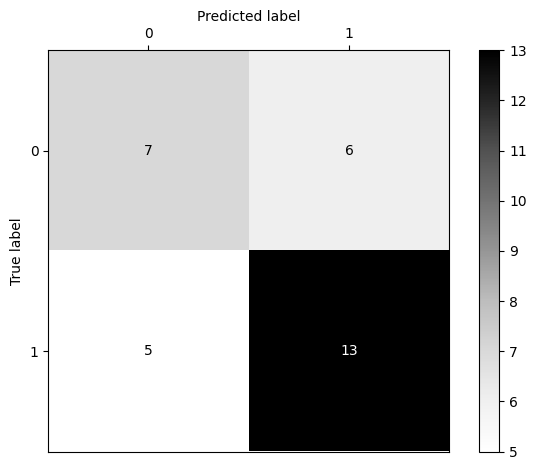

In [4]:
'''New grading scheme
'''
df_kinematic_new = pd.read_csv(os.path.join(configs['results_path'], 'kinematic_model', f'result_2.csv'))
# df_kinematic_new = pd.read_csv('./kinematic_model/results/kinematic_model/result_2.csv')
# df_kinematic_new = pd.read_csv('/project/ahoover/mhealth/zeyut/tmc/results/kinematic_model/result_2.csv')
all_preds = df_kinematic_new['Prediction'].to_list()
all_labels = df_kinematic_new['Ground Truth'].to_list()

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='micro')
recall = recall_score(all_labels, all_preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('./figures/cm_kinematic_new.pdf', dpi=300)


#### Modified Unet on CT image data
Scripts for data processing, training, and testing are under folder 'image_model'.
- Usage:
    - python run.py grade_idx (grade_idx: 1 = old grading scheme, 2 = new grading scheme)
    - run.sh under linux environment
    
Use stored results for analysis

In [14]:
'''Old grading scheme
'''
df_kinematic_old = pd.read_csv(os.path.join(configs['results_path'], 'image_model','result_1.csv'))
all_preds = df_kinematic_old['Prediction'].to_list()
all_labels = df_kinematic_old['Ground Truth'].to_list()

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='micro')
recall = recall_score(all_labels, all_preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('./figures/cm_image_old.jpg', dpi=300)

FileNotFoundError: [Errno 2] No such file or directory: '/project/ahoover/mhealth/zeyut/tmc/results/image_model/result_1.csv'

In [15]:
'''New grading scheme
'''
df_kinematic_new = pd.read_csv(os.path.join(configs['results_path'], 'image_model','result_2.csv'))
all_preds = df_kinematic_new['Prediction'].to_list()
all_labels = df_kinematic_new['Ground Truth'].to_list()

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='micro')
recall = recall_score(all_labels, all_preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(all_labels))
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('./figures/cm_image_new.jpg', dpi=300)


FileNotFoundError: [Errno 2] No such file or directory: '/project/ahoover/mhealth/zeyut/tmc/results/image_model/result_2.csv'

### Ensemble models
Use pre-saved results from each individual models. The cv folds are always identical

In [29]:
gt_path = configs['gt_path']
# Load ground truth labels and data
with open(configs['gt_path'], 'rb') as file:
    grades = pickle.load(file)
sample_codes = list(grades['old'].keys())

#### Old grading scheme

In [44]:
# Load data
df_static_old = pd.read_csv(os.path.join(configs['results_path'], 'static_model','result_1.csv'))
df_kinematic_old = pd.read_csv(os.path.join(configs['results_path'], 'kinematic_model','result_1.csv'))
# df_image_old = pd.read_csv(os.path.join(configs['results_path'], 'image_model','result_1.csv'))

In [55]:
n_classes = 5
modality_weights = [1, 1, 1]
df_list = [df_static_old, df_kinematic_old]

In [56]:
# Essemble results in new grading scheme
preds = []
y_test = []

for sc in sample_codes:
    vote_pool = np.zeros(n_classes)
    cur_y = None
    for i, df in enumerate(df_list):
        if sc in df['Sample Code'].tolist():
            row = df.loc[df['Sample Code'] == sc]
            probs = np.array(row[[f'P{j}' for j in range(n_classes)]].values[0])
            vote_pool += probs * modality_weights[i]
            if cur_y == None:
                cur_y = row['Ground Truth'].values[0]
    if cur_y == None:
        print(f'{sc} has no available data')
        continue
    y_test.append(cur_y)    
    preds.append(np.argmax(vote_pool))

y_test = np.array(y_test)
preds = np.array(preds)

H7 has no available data
H8 has no available data
H15 has no available data
H16 has no available data
H17 has no available data
J2 has no available data
J4 has no available data
J6 has no available data
J8 has no available data
J9 has no available data


In [57]:
display_labels = np.unique(y_test)
# Optional: combine classes
# y_test[(y_test == 1)] = 0
# preds[(preds == 1)] = 0
# y_test[(y_test == 2)] = 1
# preds[(preds == 2)] = 1
# y_test[(y_test == 3)] = 2
# preds[(preds == 3)] = 2
# y_test[(y_test == 4)] = 2
# preds[(preds == 4)] = 2
# display_labels = ['0-1','2','3-4']

Accuracy: 0.35135135135135137
Precision: 0.35135135135135137
Recall: 0.35135135135135137


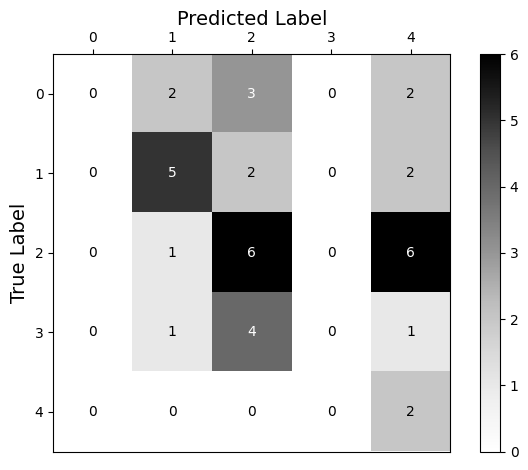

In [58]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='micro')
recall = recall_score(y_test, preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, preds, labels=np.unique(y_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.set_xlabel('Predicted Label', fontsize=14)  
ax.set_ylabel('True Label', fontsize=14) 

ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('./figures/cm_old_grade_scheme.pdf')


#### New grading sheme

In [59]:
# Load data
df_static_new = pd.read_csv(os.path.join(configs['results_path'], 'static_model','result_2.csv'))
df_kinematic_new = pd.read_csv(os.path.join(configs['results_path'], 'kinematic_model','result_2.csv'))
# df_image_new = pd.read_csv(os.path.join(configs['results_path'], 'image_model','result_2.csv'))


In [60]:
n_classes = 3
modality_weights = [1, 1, 1]
df_list = [df_static_new,df_kinematic_new]

In [61]:
# Essemble results in new grading scheme
preds = []
y_test = []

for sc in sample_codes:
    vote_pool = np.zeros(n_classes)
    cur_y = None
    for i, df in enumerate(df_list):
        if sc in df['Sample Code'].tolist():
            row = df.loc[df['Sample Code'] == sc]
            probs = np.array(row[[f'P{j}' for j in range(n_classes)]].values[0])
            vote_pool += probs * modality_weights[i]
            if cur_y == None:
                cur_y = row['Ground Truth'].values[0]
    if cur_y == None:
        print(f'{sc} has no available data')
        continue
    y_test.append(cur_y)    
    preds.append(np.argmax(vote_pool))
    

H7 has no available data
H8 has no available data
H15 has no available data
H16 has no available data
H17 has no available data
J2 has no available data
J4 has no available data
J6 has no available data
J8 has no available data
J9 has no available data


Accuracy: 0.4864864864864865
Precision: 0.4864864864864865
Recall: 0.4864864864864865


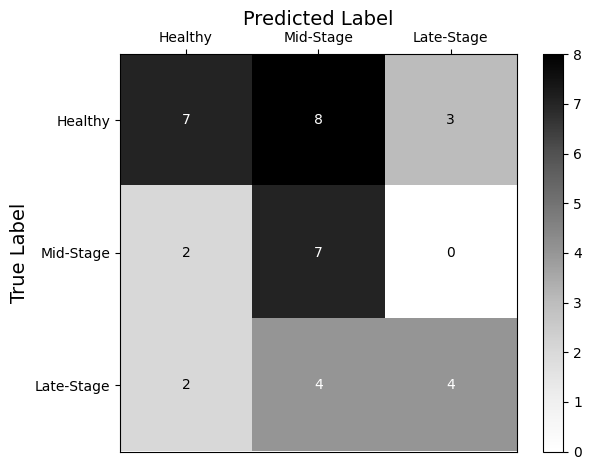

In [62]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, average='micro')
recall = recall_score(y_test, preds, average='micro')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, preds, labels=np.unique(y_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Mid-Stage', 'Late-Stage'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Greys, ax=ax)
ax.set_xlabel('Predicted Label', fontsize=14)  
ax.set_ylabel('True Label', fontsize=14) 

ax.xaxis.set_label_position('top')  # Move the x-axis label to the top
ax.xaxis.tick_top()  # Move the x-axis ticks to the top
# plt.title('Confusion Matrix')
plt.tight_layout() 
plt.show()
fig.savefig('./figures/cm_new_grading_scheme.pdf')
